# **충남대학교 - 컴퓨터 그래픽스** 

학번 : 202004183

이름 : 박시준

## 과제 안내 사항 
딥러닝 과제는 따로 보고서를 받지 않을 예정입니다. 

대신 과제 구현 시 주석을 꼭 달아서 충분히 구현한 내용에 대한 설명을 해주시면 되겠습니다.

과제 제출 기한
11월 28일 월요일 23시 59분
제출 파일 : .ipynb 파일 


##**Pytorch 기초 실습**

<img src = "https://drive.google.com/uc?id=1lZ6La7NmnOhCzSGqgMonYgvsTT_lzM2P" height = 200 width = 500> 

##**Pytorch란?**
* **파이토치(PyTorch)**는 컴퓨터 비전 및 자연어 처리와 같은 응용 프로그램에 사용되는 토치(Torch) 라이브러리를 기반으로 하는 기계 학습 프레임워크이다. 현 Meta AI가 개발(구 Facebook)하였다.
* **Tesla Autopilot**, **Uber의 Pyro**, **Hugging Face의 Transformers**, **PyTorch Lightning**, 및 **Catalyst**를 포함한 많은 딥 러닝 소프트웨어가 PyTorch 위에 구축되어 있습니다.

<img src = "https://drive.google.com/uc?id=1TIOBfghGmeyXIcF_FIHipmVZKYGOIPse" height = 200 width = 190>
<img src = "https://drive.google.com/uc?id=1FKBzFcQ6cGas7e_oh5G7gWzlA9j64Egh" height = 200 width = 190> 
<img src = "https://drive.google.com/uc?id=1iw6u8v-7kqqqcg_O-ieAwnv5ZocgNRkD" height = 200 width = 220> 
<img src = "https://drive.google.com/uc?id=1IAR-v86prmPIElUP8pU73svNrx9WcCxN" height = 200 width = 200> 
<img src = "https://drive.google.com/uc?id=1bZce4mRyzXWM4d-sDd1vS5WC_J0gDQda" height = 200 width = 200> 


 
>참고  
실행 전에 **[런타임]** → **[런타임 유형 변경]** → 유형을 **GPU**로 설정해서 GPU를 사용할 수 있게 합니다.  
본 실습은 Pytorch 공식 튜토리얼 https://pytorch.org/tutorials 과 cs231n http://cs231n.stanford.edu/ 자료를 참고하였습니다.


##**Pytorch 기초 실습 구성**
* Tensor 정의
* Tensor Shape 변경 
* Tensor 연산
* 데이터 불러오기 (CIFAR-10 dataset)
* Pytorch Module API를 이용한 Neural Network 정의 및 사용법
* 간단한 선형 분류기(Linear Classifier) 구현
* 과제 - Convolution을 이용한 이미지 분류기 구현 

## **1 Tensor 정의**


### **1.1 Tensor란?**
* Tensor는 배열 및 행렬과 매우 유사한 특수 데이터 구조입니다. PyTorch에서는 텐서를 사용하여 모델의 입력과 출력뿐만 아니라 모델의 매개 변수를 인코딩합니다.

* Tensor는 **GPU**나 다른 하드웨어 가속기에서 실행할 수 있다는 점을 제외하면 NumPy의 배열과 유사하다. 
* Tensor는 아래 그림과 같이 기본적으로 3차원이상을 지칭한다. 
<img src = "https://drive.google.com/uc?id=1vVKL1YLPd78HQE_oNOED0S4CxRj7HL5i" height = 500 width = 700>

### **1.2 Tensor 초기화하기**
* Tensor는 다양한 방식으로 초기화할수 있다. 다음은 여러 가지 방식들 중 한가지 예이다.

In [1]:
import torch
import numpy as np

data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


* Tensor는 Numpy와 자유롭게 상호 변환이 가능합니다.

In [2]:
np_array = np.array(x_data) # tensor -> numpy 변환 
print(type(np_array))
x_np = torch.from_numpy(np_array) # numpy -> tensor 변환 
print(type(x_np))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


* 이미 만들어진 Tensor로부터 속성 값(크기, 데이터 타입)을 유지한 새로운 Tensor를 생성 할 수 있다.

In [3]:
x_ones = torch.ones_like(x_data) # x_data의 크기 및 데이터 타입을 똑같이 가져오고 모두 1인 값으로 채움 
print(f"1로 채워진 Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # x_data의 크기 및 데이터 타입을 똑같이 가져오고 랜덤 값을 채움
print(f"랜덤 Tensor: \n {x_rand} \n")

1로 채워진 Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

랜덤 Tensor: 
 tensor([[0.0716, 0.8570],
        [0.5049, 0.9462]]) 



### **1.3 Tensor 속성(Attributes)**

In [4]:
tensor = torch.rand(3,4)

print(f"tensor의 크기 : {tensor.shape}")
print(f"tensor의 데이터 타입: {tensor.dtype}")
print(f"tensor가 저장된 장치 정보 : {tensor.device}")

tensor의 크기 : torch.Size([3, 4])
tensor의 데이터 타입: torch.float32
tensor가 저장된 장치 정보 : cpu


## **2 Tensor Shape 변경**

### **2.1 reshape**
* numpy의 reshape와 동일하다. tensor의 차원을 변경

In [5]:
a = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9],
                  [10,11,12]]) # 4 x 3 2차원 tensor
print("tensor a : {}".format(a))
print("tensor a size: {}".format(a.shape))



new_a = a.reshape((3,2,2)) # 3 x 2 x 2 tensor
print("new_a : {}".format(new_a))
print("new_a size : {}".format(new_a.shape))

tensor a : tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
tensor a size: torch.Size([4, 3])
new_a : tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])
new_a size : torch.Size([3, 2, 2])


### **2.2 view**
* reshape 연산과 마찬가지로 같은 데이터 타입과 같은 원소의 개수를 가지지만 크기가 다른 새로운 tensor를 반환한다.

In [6]:
a = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9],
                  [10,11,12]]) # 4 x 3 2차원 tensor
print("tensor a : {}".format(a))
print("tensor a size: {}".format(a.shape))



new_a = a.view(-1,2,2) # -1은 크기 추론 그래서 3이나옴. 2,2로 나눠주고
print("new_a : {}".format(new_a))
print("new_a size : {}".format(new_a.shape))

tensor a : tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
tensor a size: torch.Size([4, 3])
new_a : tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])
new_a size : torch.Size([3, 2, 2])


## **3 Tensor 주요 연산**


### 3.1 행렬 곱과 요소 곱

In [7]:
tensor = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9],
                  [10,11,12]]) # 4 x 3 2차원 tensor

# 행렬 곱(matrix multiplication) 연산의 다양한 표현 
y1 = tensor @ tensor.T
print(y1)
y2 = tensor.matmul(tensor.T)
print(y2)

# 요소별 곱(element-wise multiplication)
z1 = tensor * tensor
print(z1)
z2 = tensor.mul(tensor)
print(z2)

tensor([[ 14,  32,  50,  68],
        [ 32,  77, 122, 167],
        [ 50, 122, 194, 266],
        [ 68, 167, 266, 365]])
tensor([[ 14,  32,  50,  68],
        [ 32,  77, 122, 167],
        [ 50, 122, 194, 266],
        [ 68, 167, 266, 365]])
tensor([[  1,   4,   9],
        [ 16,  25,  36],
        [ 49,  64,  81],
        [100, 121, 144]])
tensor([[  1,   4,   9],
        [ 16,  25,  36],
        [ 49,  64,  81],
        [100, 121, 144]])


### 3.2 최대 최소 

In [8]:
tensor = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9],
                  [10,11,12]]) # 4 x 3 2차원 tensor

print(tensor)
# 전체 최댓값
max_value = tensor.max()
print("max : {}".format(max_value))
# 전체 최솟값
min_value = tensor.min()
print("min : {}".format(min_value))

# 최댓값 index, 축 방향에 따라
# dim : 감소시킬 차원
# dim == 0 : 행(row)을 감소시킴 -> 열 별로 
# dim == 1 : 열(column)을 감소시킴 -> 행 별로 
values, indices = torch.max(tensor,dim=1)
print("행 방향 최댓값 : {}".format(values))
print("행 방향 최댓값 index : {}".format(indices))


values, indices = torch.max(tensor,dim=0)
print("열 방향 최댓값 : {}".format(values))
print("열 방향 최댓값 index : {}".format(indices))

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
max : 12
min : 1
행 방향 최댓값 : tensor([ 3,  6,  9, 12])
행 방향 최댓값 index : tensor([2, 2, 2, 2])
열 방향 최댓값 : tensor([10, 11, 12])
열 방향 최댓값 index : tensor([3, 3, 3])


## 4 데이터 불러오기 (CIFAR-10 dataset)
* CIFAT10 dataset은 10개의 분류 범주로 나누어진 60000장의 이미지들로 구성.
* 각 이미지의 크기는 32 x 32
* 훈련 데이터 : 50000장
* 테스트 데이터 : 10000장 

<img src = "https://drive.google.com/uc?id=1MR6NfqxqiJonwDfsb_6bh2Oo4k8jmc4b" height = 500 width = 700>


In [9]:
import torchvision
import torchvision.transforms as transforms
print(torch.__version__)

1.12.1+cu113


In [10]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Batch size : 이미지를 훈련시킬 떄 훈련 시키는 이미지 단위
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [11]:
# 훈련 데이터 및 테스트 데이터 개수 확인
print(len(trainset)) # 50000 장
print(len(testset)) # 10000 장

50000
10000


In [12]:
# 데이터 정보 확인 
for img, label in trainloader:
  print(img.shape) # 4 x 3 x 32 x 32 == 배치 크기 x 채널수(RGB 3채널) x 높이 x 너비 
  print(type(img))
  print(type(label)) 
  # CIFAR-10 Dataset은 -1 ~ 1사이의 값으로 Normalization이 되어있음.
  # CIFAR-10 Dataset의 타입은 float32 
  print(img.min()) 
  print(img.max())
  print(img.dtype)
  print(label.shape)
  print(label) # 0~ 9까지의 범위를 갖음 (총 10개의 클래스)
  break

torch.Size([4, 3, 32, 32])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor(-1.)
tensor(1.)
torch.float32
torch.Size([4])
tensor([2, 3, 8, 8])


horse horse horse horse


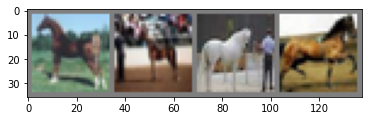

In [13]:
# 데이터 직접 시각화 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 #  [-1,1] -> [0,1]로 바꿈 unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 랜덤하게 섞은 훈련 데이터를 가져온다
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 각 이미지에 대한 class(target 값)들을 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
# 각 이미지를 배치 단위로 보여준다
imshow(torchvision.utils.make_grid(images))

## 5 Pytorch Module API를 이용한 Neural Network 정의 및 사용법

### 5.1 이미지 분류 모델 전체적인 개요
* 데이터가 들어온다(일반적으로 전처리를 함)
* 딥러닝 모델에 데이터를 넣고 학습 시킨다
* 학습 시킨 결과를 정답과 비교하여 손실 함수를 계산한다.
* 손실 함수를 미분하여(backpropagation) 모델의 학습 파라미터를 업데이트 한다.
* 위 과정을 일정 횟수만큼 반복한다
* 학습 과정을 통해 얻은 모델 파라미터를 가지고 실제 테스트 데이터에 대해서 예측한다.
* ***본 실습에서는 모델 구조를 디자인 것에 초점을 맞춘다.***

<img src = "https://drive.google.com/uc?id=1zEAialJ9VWbJltBMojLcsx9uuVQIQKpD" height = 400 width = 700>



### 5.2 Pytorch Module API 구조
* Pytorch의 ```nn.Module```을 상속받아 Model을 정의할 클래스를 생성
* 그 클래스의 내부 함수는 모델의 속성 값과 Layer에 대한 정보를 정의하는 ```__init__```함수와 모델이 데이터를 받아 실제 연산을 수행하는 ```forward``` 함수로 크게 구성되어 있다.
* ```forward```의 함수의 경우 모델을 생성 후(클래스의 객체 생성) 인자로 데이터를 받는데 이 함수를 직접 호출하는 것이 아닌 모델 객체에 인자로 넣어주면 ```Backend```으로 실행한다는 것에 주의
* 아래는 간단한 딥러닝 모델을 설계한 예시이다


```python
import torch.nn as nn
import torch.nn.functional as F


class My_Neural_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 객체 생성
net = My_Neural_Net()
# 모델에 데이터를 넣어서 forward함수 실행(backend로)해서 모델의 결과값 출력
# forward 함수를 직접 호출하지 않는 것에 주의한다.
output = net(data) 
```

## 6 간단한 선형 분류기(Linear Classifier) 구현
* 2개의 Hidden layer를 갖는 model 구현
* Linear Classifier는 Fullly Connected Layer(줄여서 FC)로 구현
* 다음은 구현 모덜의 간단한 예시

<img src = "https://drive.google.com/uc?id=1OUWMAwigkbWhGgVp3dhxh8jE3Ljiq3TS" height = 400 width = 700>


### 6.1 간단한 선형 분류기(Linear Classifier) 직관적 이해

<img src = "https://drive.google.com/uc?id=1kRGyhlxPk3k71rQAoiEwvScIovxzZ_nb" height = 400 width = 800>

<img src = "https://drive.google.com/uc?id=1ae98uHvMtOeGXosxEtXvNmLYkoBuljhb" height = 400 width = 800>

<img src = "https://drive.google.com/uc?id=198omwNwirr7gktp5aKDOhNvE4LNQBUw2" height = 400 width = 800>


### 6.2 간단한 선형 분류기(Linear Classifier) 모델 Pytorch 구현
* 모델의 Layer는 총 3개(hidden layer 2개 + output layer 1개)로 구성
* ```nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)```을 사용하여 FC 구현
* ```nn.Linear```의 인자
* ```in_features``` : 입력 데이터의 차원
* ```out_features``` : 결과 값의 차원
 

In [14]:
from torch import nn
random_seed = 1114
torch.manual_seed(random_seed)
class My_Linear_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512) #인자로 받는 첫번쨰 인자로는 입력데이터의 차원이다. 다 플래트 시킨 차원이다. 
        #원래 차원이 32 *32 *3이엿다 이게 차원이 된다 이거를 입력인자로 넘겨주고. 그 다음에 그거를 바꾸고자 하는 차원으로 넣어준다. (512차웡느로 바뀜)
        #512는 지맘대로 그 다음엔 activation fcuntion인데 그냥 딥러닝 모델이 쉽게 설명하면 이건 이론시간에 배웟을 것이다 
        #모델의 비선형성을 추가해준다는 것. 그냥 보통 어떤 레이어를 통과한ㄷ ㅏ음에 activation 함수 쓴다고만 알아두자. 자세한건 다음 시간에 설명
        #기본저긍로 어떤 레이어를 통과한 다음 쓴다고만 알아라.
        self.activation1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 512) #두번쨰를 512 , 512로 주엇다. 맞춰주여야할께 fc1 출력 ㄱ밧과 입력값은 똑같아야한다 아웃값은 맘대로.
        self.activation2 = nn.ReLU()
        self.out_fc = nn.Linear(512, 10) #클래스 10개를 예상하는거니깐 이제 10개를 아웃풋으로!

    def forward(self, x):
      #포워드에서 인풋 데이터가 들어옴 이미지가 3차원 데이터인데 플리커넥티드 데이터를 스기 위해서 1차원으로 시켜줘야하는 함수가 바로 flatten이다.
      #1이 뭐냐면 기본적으로 이미지가 데이터가 4차원 데이터인데 배치사이즈가 0이고 0 1 2 3 이 되는건데 플래트를 사용해서 첫번쨰 인덱스를 시작해서 마지막 인덱스를 다 
      #플래튼 즉 펼쳐버리겟다라는 듯 fc1은 플렉스 시킨 상태에서 통과 시키는 것. 정의를 해야함. 
      
        # x는 기본적으로 4차원 데이터
        # x : 배치 사이즈 x 3(채널수) x 높이 x 너비 
        x = x.flatten(1) # 채널 차원부터 ~ 너비까지 모두 1차원 vector로 만듦
        x = self.fc1(x)
        x = self.activation1(x)
        x = self.fc2(x)
        x = self.activation2(x)
        x = self.out_fc(x) #통과 시키고 통과시키고. 이게 과제의 기본적인 뉴럴네트워크의 기본적인 메커니즘이다. 
        return x

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model = My_Linear_model().to(device)
print("model info : \n {}".format(model))

cuda
model info : 
 My_Linear_model(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (activation1): ReLU()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (activation2): ReLU()
  (out_fc): Linear(in_features=512, out_features=10, bias=True)
)


In [16]:
# Training 하기 전 모델 예측 테스트
x = torch.rand(1,3,32,32,device=device)
output = model(x)
print("output shape : {}".format(output.shape))
prob_output = nn.Softmax(dim=-1)(output)
y_pred = prob_output.argmax(-1)
print("y_pred shape : {}".format(y_pred))
print("predicted class : {}".format(y_pred))


output shape : torch.Size([1, 10])
y_pred shape : tensor([4], device='cuda:0')
predicted class : tensor([4], device='cuda:0')


In [17]:
# loss 및 optimizer 정의 
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [18]:
# 훈련 하기


for epoch in range(10):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data[0].to(device), data[1].to(device)

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.922
[1,  4000] loss: 1.690
[1,  6000] loss: 1.635
[1,  8000] loss: 1.586
[1, 10000] loss: 1.558
[1, 12000] loss: 1.509
[2,  2000] loss: 1.414
[2,  4000] loss: 1.428
[2,  6000] loss: 1.437
[2,  8000] loss: 1.408
[2, 10000] loss: 1.395
[2, 12000] loss: 1.383
[3,  2000] loss: 1.291
[3,  4000] loss: 1.288
[3,  6000] loss: 1.294
[3,  8000] loss: 1.295
[3, 10000] loss: 1.295
[3, 12000] loss: 1.299
[4,  2000] loss: 1.166
[4,  4000] loss: 1.187
[4,  6000] loss: 1.188
[4,  8000] loss: 1.198
[4, 10000] loss: 1.229
[4, 12000] loss: 1.199
[5,  2000] loss: 1.051
[5,  4000] loss: 1.112
[5,  6000] loss: 1.115
[5,  8000] loss: 1.114
[5, 10000] loss: 1.118
[5, 12000] loss: 1.163
[6,  2000] loss: 0.994
[6,  4000] loss: 1.023
[6,  6000] loss: 1.017
[6,  8000] loss: 1.021
[6, 10000] loss: 1.066
[6, 12000] loss: 1.064
[7,  2000] loss: 0.902
[7,  4000] loss: 0.960
[7,  6000] loss: 0.945
[7,  8000] loss: 0.973
[7, 10000] loss: 0.964
[7, 12000] loss: 0.998
[8,  2000] loss: 0.835
[8,  4000] 

In [19]:
# 훈련이 끝난 모델의 파라미터 저장
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

In [20]:
# 새로운 모델 객체를 만들고 저장했던 가중치를 불러옴
new_model = My_Linear_model()
new_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [21]:
# Test 데이터로 모델 정확도 평가 
correct = 0
total = 0
model.to(device)
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


## 7 과제 - CNN(Convolutional Neural Network) 모델 구현하기
* CNN 모델을 자유롭게 구현하여 위의 Linear Classifier의 Test data에 대한 성능보다 더 높게 나오는 것이 목표
* 기본적으로 각 Layer는 ```nn.Conv2d``` -> ```nn.ReLU``` 로 구성(추가로 ```nn.ReLU``` 다음에 ```nn.MaxPool2d```도 사용 가능하나 이건 선택)
* ```nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)``` 사용할 것(https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html?highlight=conv2d#torch.nn.Conv2d API 문서 참고)
* ```nn.Conv2d``` 주요 인자
* ```in_channels``` : 입력 데이터의 채널 차원
* ```out_channels``` : 결과로 나올 데이터의 채널 차원
* ```kernel_size``` : convolution 연산 시 사용할 filter 크기(예를들어, 3x3이면 kernel_size=3)
* ```stride``` : convolution 연산 시 보폭(예를들어, stride=2, 2폭)
* ```padding``` : convolution 연산 시 padding 폭(예를들어, padding=1, padding 1폭)
* 그외 나머지 인자는 특별한 언급이 없는 한 사용하지 않아도 무방.
* **Conv 연산시 주의 사항(매우 중요)**
  * Conv연산을 하고나면 일반적으로 데이터의 공간적 크기(높이 x 너비)는 줄어들고 대신 채널 차원은 증가한다. 이것의 의미는 공간적 크기를 줄여가면서 (receptive field를 키워나가면서) 이미지의 특징을 집약한다는 것을 의미. 

<img src = "https://drive.google.com/uc?id=1A7k5CemeLt4ILoqDdplfn1jtn9kF9zm2" height = 400 width = 800>

  * Conv연산에 따른 공간적 크기가 각 conv layer를 통과할떄 마다 파악을 하고 있어야 한다. 왜냐하면 마지막 Class에 대한 FC Layer를 정의하기 위해서 인자 값으로 입력 데이터의 차원이 필요한데 이때 차원은 3차원의 이미지를 모두 1차원으로 바꾼다. 따라서 이때 1차원으로 바뀐 차원을 미리 계산하여 파악하고 있어야 한다. 공간적 크기가 어떻게 바뀌는지는 다음과 같은 식에 의해서 계산 가능.(여기서 K : kernel size, S : Stride, P: Padding 폭)

<img src = "https://drive.google.com/uc?id=1hptHexxtLiO0KA0TDMi96BDXKVQ0L6c2" height = 250 width = 500>






In [79]:
import torch
from torch import nn
import torch.nn.functional as F
#과제는 CNN배웟을 것이다 이걸 직접 연산자를 가지고 짠다. 
#이걸 가지고 모델을 예측하는것 아까 플래커니어트 머시기 아까 위에선 정확도 53 이 나왓는데 이거는 70%정도 나오더라
#이거는 53%보다 좀 더 높게 나오게 해야함. 단 컨볼루젼 연산 써서 직전에 햇던 성능이 조금 더 높게하면 만점
#컨볼루젼 레이어를 어떻게 사용하는지 설명함
#먼저 토치에서는 Conv2d를 가져와서쓰면 되는데 기본적으로 레이어라고 햇는대 각 레이어 기본 구성은 conv2d를 통과한다음 Relu를 사용한다. 
#거기다 +로 맥스 스플릿까지 ,,
#컨볼루젼 하면 공간 크기는 줄어들고 채널 차원은 증가한다. 클래스를 예측하고자 할대 플래커넥티드를 통과시킬거다
#아까전에 햇을떄에는 최종적으로 클래스를 예측하기 위해 플레커넥티드 레이어를 통과시켜 아웃풀을 만들것인데. 뒤에 10인 고정이 될거다.
#그런데 512라고 하는 인풋값은 어떻게 cnn설정에 따라 다 값이 달라질것이다. 여러분게서 컨볼루젼 레이어를 통과할때 ㅓㅍㄹ레커넥티드 레이어에서 그 값을 설정하기 위해서 각각 레이어를 통과햇을대 shape와 채널이 몇인지를 파악 할 수 있어야 한다
#그래야 넣을 수 있따.
#그래서 컨볼루젼은 통과했을대 옵션을 줘서 나오는 아웃풋의 값을 어떻게 알 수 있을까? 밑에 그냥 단순한 공식이 잇다. ih 인풋 높이 
#kh은 커널 2p 패딩 s 는 스트라이드. floor는 거리. 
class My_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        #####################################
        # TODO __init__ 메소드 구현
        #####################################
        #28 * 28 => 24 * 24 => 12 * 12 -> 8 * 8 -> 4 * 4 -> 10 

        #특징을 추출해서 학습을 한다--
        #RGB라고 하면 채널 수가 3개. 출력 수는 6으로 설정 하였습니다. 필터는 5*5를 사용 하였습니다.
        self.conv1 = nn.Conv2d(3, 6, 5, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
        #출력된 값으로 채널 수 유지하면서 풀링을 해줍니다.
        self.pool1 = nn.MaxPool2d(2,2)
        self.activation1 = nn.ReLU()
        #이전에선 6개의 채널을 출력으로 냈으니 6개의 채널을 받아 16개를 출력을 합니다 필터는 5*5를 사용 하였습니다.
        self.conv2 = nn.Conv2d(6, 16, 5, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
        #출력된 값으로 채널 수 유지하면서 풀링을 해줍니다.
        self.pool2 = nn.MaxPool2d(2,2)
        self.activation2 = nn.ReLU()
        #flatten을 해줘 쭉 늘려줍니다.
        #fully connected layer 만듭니다
        #16개의 채널을 사용하엿고 5*5를 사용, 아웃값은 512로 설정 하였습니다.
        self.fc3 = nn.Linear(16 * 5 * 5, 512)
        #activation function을 적용해줍니다. 
        self.activation3 = nn.ReLU()
        #이제 classification을 해야하니 10개 노드를 가진 FC layer를 만듭니다
        self.fc4 = nn.Linear(512, 10)
        #activation function을 적용합니다.
        self.activation4 = nn.ReLU()
    def forward(self, x):
        #####################################
        # TODO Forward 메소드 구현
        # x는 기본적으로 4차원 데이터
        # x : 배치 사이즈 x 3(채널수) x 높이 x 너비 
        #####################################

        #위의 과정을 순서대로 적어주었습니다.
        x = self.conv1(x)
        x = self.activation1(x)
        x = self.pool1(x)
        x = self.conv2(x) 
        x = self.activation2(x)
        x = self.pool2(x)
        x = x.flatten(1) #펴주는 역할
        x = self.fc3(x)
        x = self.activation3(x)
        x = self.fc4(x)
        x = self.activation4(x)
        return x

In [80]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model = My_CNN().to(device)
# 모델 아키텍처를 확인하고 싶으면 주석 풀어서 확인 
#print("model info : \n {}".format(model))

# loss 및 optimizer 정의 
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


# 훈련 하기
# epoch는 동일하게 10으로 설정 
for epoch in range(10):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data[0].to(device), data[1].to(device)

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


# 훈련이 끝난 모델의 파라미터 저장
PATH = './my_cnn.pth'
torch.save(model.state_dict(), PATH)

cuda
[1,  2000] loss: 2.231
[1,  4000] loss: 1.999
[1,  6000] loss: 1.722
[1,  8000] loss: 1.542
[1, 10000] loss: 1.473
[1, 12000] loss: 1.444
[2,  2000] loss: 1.335
[2,  4000] loss: 1.307
[2,  6000] loss: 1.294
[2,  8000] loss: 1.276
[2, 10000] loss: 1.231
[2, 12000] loss: 1.224
[3,  2000] loss: 1.094
[3,  4000] loss: 1.118
[3,  6000] loss: 1.135
[3,  8000] loss: 1.100
[3, 10000] loss: 1.137
[3, 12000] loss: 1.122
[4,  2000] loss: 0.983
[4,  4000] loss: 0.990
[4,  6000] loss: 0.985
[4,  8000] loss: 1.015
[4, 10000] loss: 1.012
[4, 12000] loss: 1.008
[5,  2000] loss: 0.879
[5,  4000] loss: 0.888
[5,  6000] loss: 0.903
[5,  8000] loss: 0.925
[5, 10000] loss: 0.931
[5, 12000] loss: 0.926
[6,  2000] loss: 0.764
[6,  4000] loss: 0.795
[6,  6000] loss: 0.829
[6,  8000] loss: 0.837
[6, 10000] loss: 0.859
[6, 12000] loss: 0.862
[7,  2000] loss: 0.680
[7,  4000] loss: 0.712
[7,  6000] loss: 0.734
[7,  8000] loss: 0.768
[7, 10000] loss: 0.795
[7, 12000] loss: 0.801
[8,  2000] loss: 0.600
[8,  4

In [81]:
# 새로운 모델 객체를 만들고 저장했던 가중치를 불러옴
new_model = My_CNN()
new_model.load_state_dict(torch.load(PATH))

# Test 데이터로 모델 정확도 평가 
correct = 0
total = 0
model.to(device)
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %
